# **ASSIGNMENT 5**

# **Mobile Price Classification using Artificial Neural Network (ANN)**

# **Introduction**

In today’s competitive smartphone market, determining the appropriate price of a mobile phone based on its features is a critical task. Bob, a new entrepreneur in the mobile industry, aims to compete with major brands like Apple and Samsung. However, he lacks the expertise to estimate the price range of the mobile phones his company designs.

To assist Bob, we use Machine Learning — specifically an Artificial Neural Network (ANN) — to predict the price range of a mobile phone based on its technical specifications. The model learns from past mobile sales data and identifies hidden patterns between a phone’s features (such as RAM, battery power, screen size, camera quality, etc.) and its price category.


# Objective

The main goal of the project is to:

* Build an **ANN-based classification** model that predicts the price range of a mobile phone.
* Use hyperparameter tuning to find the most accurate and efficient model configuration.
* Help Bob make data-driven decisions when pricing new mobile devices.

# Dataset Description

The dataset used for this project is named mobile_price_classification.csv.
It contains several mobile phone features and a target column named price_range, which indicates the class label.

## Features:-
1. **battery_power**  - Total energy capacity of the battery(in mAh).
2. **bluetooth**	- Whether the phone supports Bluetooth (1 = Yes, 0 = No).
3. **clock_speed**	- Speed at which the microprocessor executes instructions (in GHz).
4. **dual_sim**	- Whether the phone supports dual SIMs (1 = Yes, 0 = No).
5. **front_cam**	- Megapixels of the front camera.
6. **4G**	- Whether the phone supports 4G (1 = Yes, 0 = No).
7. **int_memory**	- Internal memory (in GB).
8. **m_dep**	- Mobile depth (in cm).
9. **mobile_wt** - Weight of the mobile phone (in grams).
10. **n_cores**	- Number of processor cores.
11. **primary_camera**	- Megapixels of the primary camera.
12. **px_height**	- Pixel resolution height.
13. **px_width**	- Pixel resolution width.
14. **ram**	RAM capacity (in MB).
15. **sc_h**	- Screen height of the mobile (in cm).
16. **sc_w** - Screen width of the mobile (in cm).
17. **talk_time**	- Maximum time the phone can last on a single charge (in hours).
18. **three_g**	- Whether the phone supports 3G (1 = Yes, 0 = No).
19. **touch_screen**	- Whether the phone has a touch screen (1 = Yes, 0 = No).
10. **wifi** - Whether the phone supports Wi-Fi (1 = Yes, 0 = No).

## Target:-
* **price_range** - Target variable (0 = Low cost, 1 = Medium cost, 2 = High cost, 3 = Very high cost).

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
path = '/content/drive/MyDrive/Colab Notebooks/AI_ML_ICT/NOTES/Codes/Data/mobile_price_classification.csv'

# 1. Import Libraries

In [4]:
!pip install keras-tuner -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.9 MB/s eta 0:00:00


In [3]:
# Importing pandas for data manipulation and analysis
import pandas as pd

# Importing numpy for numerical computations and array operations
import numpy as np

# Importing train_test_split to divide the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Importing StandardScaler to normalize or scale feature values
from sklearn.preprocessing import StandardScaler

# Importing Sequential model from Keras to build a neural network layer by layer
from tensorflow.keras.models import Sequential

# Importing Dense and Drpout layers to create fully connected layers and prevent overfitting
from tensorflow.keras.layers import Dense, Dropout

# Importing to_categorical to convert class labels into one-hot encoded format
from tensorflow.keras.utils import to_categorical

# Importing RandomSearch tuner from keras_tuner for hyperparameter tuning
from keras_tuner.tuners import RandomSearch

# Importing matplotlib for visualizing graphs and performance metrics
import matplotlib.pyplot as plt

# Importing TensorFlow library as tf for deep learning model training and execution
import tensorflow as tf

# Importing keras as kt for Keras API operations and model creation
import keras as kt

# Importing HyperParameters class from keras_tuner to define tunable parameters
from keras_tuner import HyperParameters

# 2. Load Dataset


In [4]:
# Reading the dataset from the specified file path using pandas
df = pd.read_csv(path)

# Printing a message to indicate that the first 5 rows of the dataset will be displayed
print('First 5 rows of the dataset:')

# Displaying the first 5 rows of the DataFrame to get an overview of the data
df.head(5)


First 5 rows of the dataset:


,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4G,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
# Display dataset information such as column names, data types, and non-null counts
print("\nDataset info:")
df.info()


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   battery_power   2000 non-null   int64  
 1   bluetooth       2000 non-null   int64  
 2   clock_speed     2000 non-null   float64
 3   dual_sim        2000 non-null   int64  
 4   front_cam       2000 non-null   int64  
 5   4G              2000 non-null   int64  
 6   int_memory      2000 non-null   int64  
 7   m_dep           2000 non-null   float64
 8   mobile_wt       2000 non-null   int64  
 9   n_cores         2000 non-null   int64  
 10  primary_camera  2000 non-null   int64  
 11  px_height       2000 non-null   int64  
 12  px_width        2000 non-null   int64  
 13  ram             2000 non-null   int64  
 14  sc_h            2000 non-null   int64  
 15  sc_w            2000 non-null   int64  
 16  talk_time       2000 non-null   int64  
 17  three_g         20

# 3. Preprocessing

In [6]:
# Check for missing values
print('Missing values in dataset:')
df.isnull().sum()

Missing values in dataset:


,0
battery_power,0
bluetooth,0
clock_speed,0
dual_sim,0
front_cam,0
4G,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


In [7]:
# Remove any leading/ trailing spaces in column names
df.columns = df.columns.str.strip()

In [8]:
# Split dataset into features (X) and target (y)
x = df.drop('price_range', axis=1)

# Convert target variable into one-hot encoded format for multi-class classification
y = to_categorical(df['price_range'])

In [9]:
# Feature scaling
# Initialize StandardScaler to normalize feature values
scaler = StandardScaler()

# Fit the scaler on feature data and transform it for uniform scaling
x_scaled = scaler.fit_transform(x)

In [10]:
# Train-test split
# Split the scaled data into training and testing sets (80%-20%) with stratified sampling
x_train, x_test, y_train, y_test = train_test_split(
    x_scaled, y, test_size=0.2, random_state=42, stratify=y )

In [11]:
# Display shapes of the training and testing datasets
print("\nTraining shape:", x_train.shape)
print("Testing shape:", x_test.shape)


Training shape: (1600, 20)
Testing shape: (400, 20)


# 4. Base ANN Model

## 4.1 Build Base ANN Model

In [13]:
# Build a base neural network model using the Sequential API
base_model = Sequential([
    # Input layer with 64 neurons and ReLU activation function
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)),

    # Dropout
    Dropout(0.3),

    # Hidden layer with 32 neurons and ReLU activation
    Dense(32, activation='relu'),

    # Hidden layer with 16 neurons and ReLU activation
    Dense(16, activation='relu'),

    # Output layer with 4 neurons (for 4 classes) using softmax for probability distribution
    Dense(4, activation='softmax')
])

# Compile the model with Adam optimizer and categorical crossentropy loss for multi-class classification
base_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model on training data and validate using testing data
history_base = base_model.fit(
    x_train, y_train,                 # Training data and labels
    validation_data=(x_test, y_test), # Validation data for monitoring performance
    epochs=50,                        # Number of iterations through the entire dataset
    batch_size=32,                    # Number of samples per gradient update
    verbose=1                         # Display progress output during training
)


Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.2504 - loss: 1.4381 - val_accuracy: 0.4575 - val_loss: 1.2679
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4310 - loss: 1.2344 - val_accuracy: 0.5600 - val_loss: 1.0257
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5609 - loss: 1.0131 - val_accuracy: 0.6700 - val_loss: 0.7831
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6460 - loss: 0.8038 - val_accuracy: 0.7675 - val_loss: 0.5945
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7592 - loss: 0.6087 - val_accuracy: 0.8500 - val_loss: 0.4596
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8164 - loss: 0.4833 - val_accuracy: 0.8775 - val_loss: 0.3761
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7994 - loss: 0.4629 - val_accuracy: 0.8875 - val_loss: 0.3370
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8341 - loss: 0.3863 - val_accuracy: 0.8950 - val_loss:

## 4.2 Evaluate Base Model

In [14]:
# Evaluate the base model on the test dataset
# This will return the final loss and accuracy values for the model
loss, acc = base_model.evaluate(x_test, y_test)

# Print test loss and accuracy to assess how well the model performs on unseen (test) data
print("Test Loss:", loss)
print("Test Accuracy:", acc)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9136 - loss: 0.2178 
Test Loss: 0.20780207216739655
Test Accuracy: 0.9175000190734863


In [15]:
# Predict class probabilities on the test data
# - The model outputs probabilities for each class (e.g., [0.1, 0.7, 0.15, 0.05])
# - Each row corresponds to one test sample's probability distribution across all classes
y_pred_base = base_model.predict(x_test)

# Displat the predicted class probabilities on the test data
y_pred_base

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


array([[4.4669601e-01, 5.5330402e-01, 2.3048721e-10, 4.4466974e-26],
       [3.2876729e-10, 1.9544724e-01, 8.0455279e-01, 5.3477023e-09],
       [4.1602649e-31, 2.0457273e-12, 3.5818695e-04, 9.9964178e-01],
       ...,
       [2.1063204e-14, 2.2318757e-04, 9.9828899e-01, 1.4879789e-03],
       [8.5592270e-04, 9.9913120e-01, 1.2879045e-05, 3.6198146e-16],
       [9.0007298e-13, 5.5261876e-04, 9.9883801e-01, 6.0938572e-04]],
      dtype=float32)

In [16]:
# Convert predicted probabilities to class labels
# - np.argmax() selects the index (class) with the highest probability for each sample
y_pred_base_classes = np.argmax(y_pred_base, axis=1)

# Display the Predicted class labels
y_pred_base_classes

array([1, 2, 3, 1, 0, 1, 2, 3, 2, 3, 0, 3, 3, 2, 0, 0, 1, 3, 2, 0, 2, 3,
       0, 1, 0, 2, 2, 3, 1, 2, 3, 1, 3, 1, 1, 0, 3, 0, 2, 3, 1, 3, 3, 1,
       0, 3, 1, 0, 1, 2, 3, 0, 3, 1, 3, 0, 0, 3, 1, 2, 2, 1, 0, 2, 3, 2,
       3, 2, 0, 0, 0, 1, 2, 2, 1, 3, 1, 1, 2, 0, 0, 1, 1, 3, 3, 2, 3, 3,
       3, 3, 3, 1, 1, 0, 3, 0, 3, 3, 1, 1, 1, 2, 1, 2, 0, 0, 2, 1, 2, 2,
       3, 1, 0, 2, 0, 1, 1, 1, 1, 2, 1, 3, 1, 3, 0, 0, 1, 3, 1, 1, 0, 3,
       3, 2, 1, 2, 2, 0, 1, 0, 0, 0, 1, 2, 0, 1, 2, 2, 3, 2, 0, 3, 2, 2,
       0, 0, 0, 0, 3, 1, 1, 2, 3, 0, 2, 3, 0, 1, 0, 2, 2, 2, 2, 0, 0, 2,
       2, 0, 3, 0, 1, 2, 1, 0, 3, 1, 3, 2, 3, 2, 3, 1, 2, 1, 1, 3, 1, 0,
       2, 2, 2, 1, 2, 1, 3, 3, 0, 2, 2, 1, 3, 0, 1, 3, 3, 0, 2, 1, 0, 0,
       3, 0, 1, 1, 1, 2, 1, 1, 2, 2, 3, 1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 0,
       3, 2, 0, 1, 0, 0, 0, 1, 2, 3, 0, 0, 2, 0, 0, 1, 1, 0, 1, 1, 1, 2,
       3, 3, 0, 2, 1, 0, 0, 3, 3, 3, 2, 0, 1, 1, 1, 2, 0, 1, 1, 2, 2, 3,
       2, 2, 2, 0, 2, 3, 0, 2, 2, 2, 3, 2, 2, 2, 2,

In [17]:
# Convert one-hot encoded true labels (e.g., [0, 0, 1, 0]) to class indices (e.g., 2)
# This makes it possible to compare true labels with predicted labels
y_true_classes = np.argmax(y_test, axis=1)

# Display the true class labels
# - Used to evaluate model accuracy and performance
y_true_classes

array([0, 2, 3, 1, 0, 1, 3, 3, 2, 3, 0, 3, 3, 2, 0, 0, 1, 3, 2, 0, 2, 3,
       0, 1, 1, 2, 2, 3, 1, 2, 2, 1, 3, 1, 1, 0, 3, 0, 2, 3, 1, 3, 3, 1,
       0, 3, 0, 0, 1, 2, 3, 0, 3, 1, 3, 0, 0, 3, 1, 2, 2, 1, 0, 2, 3, 2,
       3, 2, 0, 0, 0, 1, 2, 2, 1, 3, 0, 0, 2, 0, 0, 1, 1, 3, 3, 2, 3, 3,
       3, 3, 3, 1, 1, 0, 3, 0, 3, 3, 1, 1, 0, 2, 2, 3, 0, 0, 2, 1, 2, 2,
       3, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 3, 0, 3, 0, 0, 1, 3, 1, 0, 0, 3,
       3, 2, 0, 2, 2, 0, 1, 0, 0, 0, 1, 2, 0, 1, 2, 2, 3, 2, 0, 3, 2, 2,
       0, 0, 0, 0, 3, 1, 1, 2, 3, 0, 2, 2, 0, 1, 0, 3, 2, 2, 2, 0, 1, 2,
       2, 0, 3, 0, 1, 1, 1, 0, 3, 1, 3, 2, 2, 2, 3, 1, 2, 1, 0, 3, 1, 0,
       2, 2, 2, 1, 2, 1, 3, 3, 0, 2, 2, 1, 3, 0, 1, 3, 3, 0, 2, 1, 0, 0,
       3, 0, 1, 1, 1, 2, 1, 1, 2, 2, 3, 1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 0,
       3, 2, 0, 1, 0, 0, 0, 1, 2, 3, 0, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 2,
       3, 3, 0, 2, 1, 0, 0, 3, 3, 3, 2, 0, 1, 1, 0, 2, 0, 1, 1, 2, 2, 3,
       2, 2, 2, 0, 2, 3, 0, 2, 2, 2, 3, 2, 2, 2, 2,

In [18]:
# Import accuracy_score and classification_report from sklearn for evaluation
from sklearn.metrics import accuracy_score, classification_report

# Calculate and print the test accuracy of the base model
print("\nBase Model Test Accuracy:", accuracy_score(y_true_classes, y_pred_base_classes))

# Print detailed classification report including precision, recall, and F1-score
print("\nClassification Report (Base Model):\n", classification_report(y_true_classes, y_pred_base_classes))


Base Model Test Accuracy: 0.9175

Classification Report (Base Model):
               precision    recall  f1-score   support

           0       0.96      0.86      0.91       100
           1       0.86      0.92      0.89       100
           2       0.90      0.96      0.93       100
           3       0.97      0.93      0.95       100

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400



## 4.3 Base Model Performance Graphs

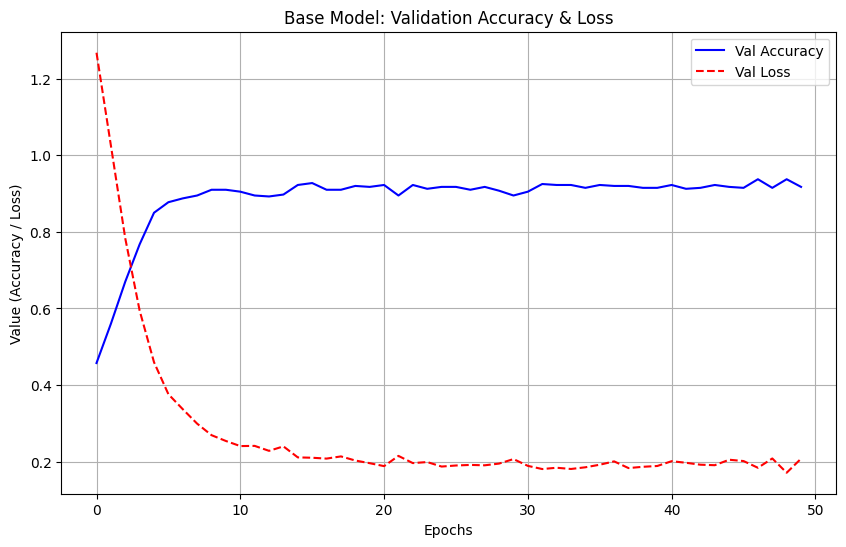

In [33]:
# Create a figure of size (10, 6)
plt.figure(figsize=(10, 6))

# Plot Accuracy
# Plot validation accuracy (dotted line)
plt.plot(history_base.history['val_accuracy'], label='Val Accuracy', color='blue', linestyle='-')


# Plot Loss
# Plot validation loss (dotted line)
plt.plot(history_base.history['val_loss'], label='Val Loss', color='red', linestyle='--')

#  Add Titles and Labels

plt.title("Base Model: Validation Accuracy & Loss")  # Main title
plt.xlabel("Epochs")                                            # X-axis label
plt.ylabel("Value (Accuracy / Loss)")                           # Y-axis label

# Show legend to identify each curve
plt.legend()

# Add grid for clarity
plt.grid(True)

# Display the graph
plt.show()


**Insights:-**

The graph represents the validation accuracy and loss for the base artificial neural network model over 50 epochs. From the plot, it can be observed that the validation accuracy (blue curve) steadily increases during the initial epochs and stabilizes around 0.9 (or 90%), indicating that the model learns the underlying patterns effectively. Meanwhile, the validation loss (red dashed curve) shows a sharp decline during the early epochs, dropping from above 1.2 to below 0.2, and then flattens out. This behavior shows the model successfully minimizes the error between predicted and actual values. The point of stabilization for both metrics suggests that the model achieves good generalization after approximately 10 epochs. However, since there is no significant improvement after this stage, further training could lead to overfitting. Overall, the base model performs well, but fine-tuning the parameters might yield even better accuracy and faster convergence.

# 5. Hyperparameter Tuning with Keras Tuner

## 5.1 Hyperparameter Tuned ANN Model

In [19]:
# Create a HyperParameters object to store tunable parameter values
hp = HyperParameters()

# Define a tunable integer hyperparameter for number of layers (1 to 4)
num_layers = hp.Int('num_layers', 1, 4)

# Define a tunable choice hyperparameter for number of neurons in each layer
units = hp.Choice('units', [32, 64, 128, 256])

# Define a tunable choice hyperparameter for activation function
activation = hp.Choice('activation', ['relu', 'tanh'])

# Display the current hyperparameter settings
print("Current Hyperparameters:")
print(hp.values)

Current Hyperparameters:
{'num_layers': 1, 'units': 32, 'activation': 'relu'}


In [20]:
# Define a function to build a neural network with hyperparameter tuning
def build_model(hp):
    model = Sequential()  # Initialize a Sequential model

    # Define number of hidden layers to be tuned (1 to 4)
    num_layers = hp.Int('num_layers', 1, 4)

    # Add hidden layers dynamically based on tuner choice
    for i in range(num_layers):
        model.add(Dense(
            units=hp.Choice(f'units_{i}', [32, 64, 128, 256]),     # Tune number of neurons
            activation=hp.Choice(f'activation_{i}', ['relu', 'tanh']),  # Tune activation function
            input_shape=(x_train.shape[1],) if i == 0 else None    # Set input shape for first layer
        ))
        # Add optional dropout to prevent overfitting
        model.add(Dropout(rate=hp.Choice('dropout', [0.0, 0.2, 0.3])))

    # Add output layer with 4 neurons (for 4 classes) using softmax activation
    model.add(Dense(4, activation='softmax'))

    # Choose optimizer type to be tuned
    optimizer = hp.Choice('optimizer', ['adam', 'sgd', 'rmsprop'])

    # Set learning rate based on optimizer choice
    if optimizer == 'adam':
        opt = tf.keras.optimizers.Adam(learning_rate=hp.Choice('lr', [0.01, 0.001, 0.0001]))
    elif optimizer == 'sgd':
        opt = tf.keras.optimizers.SGD(learning_rate=hp.Choice('lr', [0.01, 0.001, 0.0001]))
    else:
        opt = tf.keras.optimizers.RMSprop(learning_rate=hp.Choice('lr', [0.01, 0.001, 0.0001]))

    # Compile the model with categorical crossentropy loss and accuracy metric
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    # Return the built and compiled model for tuning
    return model

In [22]:
# Initialize a RandomSearch tuner for hyperparameter optimization
# - Uses the build_model function to create models with different hyperparameters
tuner = RandomSearch(
    build_model,                        # Model building function
    objective='val_accuracy',            # Metric to optimize (validation accuracy)
    max_trials=10,                       # Maximum number of hyperparameter combinations to try
    directory='tuner_results',           # Directory to save tuner results
    project_name='mobile_price_classification_prediction'  # Name for the tuning project
)

# Run the hyperparameter search on training data
# - Evaluates different hyperparameter combinations and selects the best
# - epochs can be reduced for faster testing during development
tuner.search(
    x_train, y_train,                    # Training data and labels
    validation_data=(x_test, y_test),    # Validation data for evaluation during tuning
    epochs=50,                            # Number of epochs for each trial
    batch_size=32,                        # Batch size for training
    verbose=1                             # Display training progress
)

# Retrieve the best model found by the tuner
best_model = tuner.get_best_models(num_models=1)[0]

# Retrieve the hyperparameters of the best model
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]

# Display the best hyperparameters chosen by the tuner
print("\nBest Hyperparameters:")
print(best_hp.values)

Trial 10 Complete [00h 00m 15s]
val_accuracy: 0.8774999976158142

Best val_accuracy So Far: 0.9574999809265137
Total elapsed time: 00h 02m 35s

Best Hyperparameters:
{'num_layers': 1, 'units_0': 64, 'activation_0': 'tanh', 'dropout': 0.3, 'optimizer': 'rmsprop', 'lr': 0.01, 'units_1': 64, 'activation_1': 'relu', 'units_2': 256, 'activation_2': 'tanh', 'units_3': 256, 'activation_3': 'tanh'}


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


## 5.2. Train Best Model on Full Training data

In [23]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# EarlyStopping: Stop training when validation loss stops improving
early_stop = EarlyStopping(
    monitor='val_loss',          # Monitor validation loss
    patience=5,                  # Stop after 5 epochs with no improvement
    restore_best_weights=True    # Restore model weights from the best epoch
)

# ModelCheckpoint: Save the model with the best validation accuracy
checkpoint = ModelCheckpoint(
    'best_model.keras',             # File to save the best model
    monitor='val_accuracy',      # Monitor validation accuracy
    save_best_only=True,         # Save only if val_accuracy improves
    mode='max',                  # Maximize the monitored metric
    verbose=1
)

# ReduceLROnPlateau: Reduce learning rate if validation loss plateaus
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',          # Monitor validation loss
    factor=0.5,                  # Reduce learning rate by 50%
    patience=3,                  # Wait 3 epochs before reducing LR
    min_lr=1e-6,                 # Minimum learning rate
    verbose=1
)

In [24]:
# Train the model with all callbacks applied
history_best = best_model.fit(
    x_train, y_train,                     # Training features and labels
    validation_data=(x_test, y_test),     # Validation data
    epochs=50,                             # Maximum number of epochs
    batch_size=32,                         # Number of samples per gradient update
    verbose=1,                             # Show training progress
    callbacks=[early_stop, checkpoint, lr_scheduler]  # Apply EarlyStopping, ModelCheckpoint, and LR scheduler
)

Epoch 1/50
26/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9251 - loss: 0.1697   
Epoch 1: val_accuracy improved from -inf to 0.93250, saving model to best_model.keras
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9276 - loss: 0.1646 - val_accuracy: 0.9325 - val_loss: 0.1568 - learning_rate: 0.0100
Epoch 2/50
27/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9729 - loss: 0.0858 
Epoch 2: val_accuracy improved from 0.93250 to 0.94250, saving model to best_model.keras
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9660 - loss: 0.0992 - val_accuracy: 0.9425 - val_loss: 0.1385 - learning_rate: 0.0100
Epoch 3/50
30/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9522 - loss: 0.1158 
Epoch 3: val_accuracy improved from 0.94250 to 0.94750, saving model to best_model.keras
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9499 - loss: 0.1238 - val_accuracy: 0.9475 - val_loss: 0.1228 - learning_rate: 0.0100
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 

In [25]:
# Load the best saved model
best_model = tf.keras.models.load_model('best_model.keras')

## 5.3 Evaluate the Best Model

In [26]:
# Predict class probabilities on the test data using the best saved model
y_pred = best_model.predict(x_test)  # y_pred will have probabilities for each class

# Display predicted probabilities
y_pred  # Shows the model's confidence for each class for each test sample

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


array([[9.1852862e-01, 8.1471354e-02, 1.2303383e-10, 2.8119892e-21],
       [6.5669520e-10, 3.0130029e-01, 6.9869965e-01, 2.0523692e-09],
       [1.8836026e-30, 4.6891311e-20, 4.6952970e-09, 9.9999994e-01],
       ...,
       [2.2913088e-16, 3.8239787e-06, 9.9987721e-01, 1.1899420e-04],
       [6.4723141e-04, 9.9934703e-01, 5.7553270e-06, 2.1357680e-15],
       [1.5984312e-16, 2.7841995e-06, 9.9993366e-01, 6.3494095e-05]],
      dtype=float32)

In [27]:
# Convert predicted probabilities to discrete class labels
y_pred_classes = np.argmax(y_pred, axis=1)  # Picks the class with highest probability for each sample

# Display predicted class labels
y_pred_classes  # Shows the predicted class index for each test sample

array([0, 2, 3, 1, 0, 1, 3, 3, 2, 3, 0, 3, 3, 2, 0, 0, 1, 3, 2, 0, 2, 3,
       0, 0, 0, 2, 2, 3, 1, 2, 2, 1, 3, 1, 1, 0, 3, 0, 2, 3, 1, 3, 3, 1,
       0, 3, 0, 0, 1, 2, 3, 0, 3, 1, 3, 0, 0, 3, 1, 2, 2, 1, 0, 2, 3, 2,
       3, 2, 0, 0, 0, 1, 2, 2, 1, 3, 0, 0, 2, 0, 0, 1, 1, 3, 3, 2, 3, 3,
       3, 3, 3, 1, 1, 0, 3, 0, 3, 3, 1, 1, 1, 2, 1, 3, 0, 0, 2, 1, 2, 2,
       3, 1, 0, 2, 0, 1, 1, 0, 1, 2, 1, 3, 0, 3, 0, 0, 1, 3, 0, 0, 0, 3,
       3, 2, 0, 2, 2, 0, 1, 0, 0, 0, 1, 2, 0, 1, 2, 2, 3, 2, 0, 3, 2, 2,
       0, 0, 0, 0, 3, 1, 1, 2, 3, 0, 2, 3, 0, 1, 0, 3, 2, 2, 2, 0, 0, 2,
       2, 0, 3, 0, 1, 1, 1, 0, 3, 1, 3, 2, 2, 2, 3, 1, 3, 1, 0, 3, 1, 0,
       2, 2, 2, 1, 2, 1, 3, 3, 0, 2, 2, 1, 3, 0, 1, 3, 3, 0, 2, 1, 0, 0,
       3, 0, 1, 1, 1, 2, 1, 1, 2, 2, 3, 1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 0,
       3, 2, 0, 1, 0, 0, 0, 1, 2, 3, 0, 0, 2, 0, 0, 1, 1, 0, 1, 1, 1, 2,
       3, 3, 0, 2, 1, 0, 0, 3, 3, 3, 2, 0, 1, 1, 0, 2, 0, 1, 1, 2, 2, 3,
       2, 2, 2, 0, 2, 3, 0, 2, 2, 2, 3, 2, 2, 2, 2,

In [28]:
# Convert one-hot encoded true labels to class indices
y_true_classes = np.argmax(y_test, axis=1)  # Converts one-hot labels to original class indices

# Display true class labels
y_true_classes  # Shows the actual class index for each test sample

array([0, 2, 3, 1, 0, 1, 3, 3, 2, 3, 0, 3, 3, 2, 0, 0, 1, 3, 2, 0, 2, 3,
       0, 1, 1, 2, 2, 3, 1, 2, 2, 1, 3, 1, 1, 0, 3, 0, 2, 3, 1, 3, 3, 1,
       0, 3, 0, 0, 1, 2, 3, 0, 3, 1, 3, 0, 0, 3, 1, 2, 2, 1, 0, 2, 3, 2,
       3, 2, 0, 0, 0, 1, 2, 2, 1, 3, 0, 0, 2, 0, 0, 1, 1, 3, 3, 2, 3, 3,
       3, 3, 3, 1, 1, 0, 3, 0, 3, 3, 1, 1, 0, 2, 2, 3, 0, 0, 2, 1, 2, 2,
       3, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 3, 0, 3, 0, 0, 1, 3, 1, 0, 0, 3,
       3, 2, 0, 2, 2, 0, 1, 0, 0, 0, 1, 2, 0, 1, 2, 2, 3, 2, 0, 3, 2, 2,
       0, 0, 0, 0, 3, 1, 1, 2, 3, 0, 2, 2, 0, 1, 0, 3, 2, 2, 2, 0, 1, 2,
       2, 0, 3, 0, 1, 1, 1, 0, 3, 1, 3, 2, 2, 2, 3, 1, 2, 1, 0, 3, 1, 0,
       2, 2, 2, 1, 2, 1, 3, 3, 0, 2, 2, 1, 3, 0, 1, 3, 3, 0, 2, 1, 0, 0,
       3, 0, 1, 1, 1, 2, 1, 1, 2, 2, 3, 1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 0,
       3, 2, 0, 1, 0, 0, 0, 1, 2, 3, 0, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 2,
       3, 3, 0, 2, 1, 0, 0, 3, 3, 3, 2, 0, 1, 1, 0, 2, 0, 1, 1, 2, 2, 3,
       2, 2, 2, 0, 2, 3, 0, 2, 2, 2, 3, 2, 2, 2, 2,

In [29]:
# Calculate test accuracy by comparing predicted vs true class labels
test_accuracy = accuracy_score(y_true_classes, y_pred_classes)  # Returns overall accuracy

# Print test accuracy
print("Test Accuracy:", test_accuracy)  # Shows the model's performance on unseen data

# Generate detailed classification metrics for each class
print("\nClassification Report:\n", classification_report(y_true_classes, y_pred_classes))
# Outputs precision, recall, f1-score, and support for each class

Test Accuracy: 0.965

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96       100
           1       0.98      0.91      0.94       100
           2       0.97      0.97      0.97       100
           3       0.98      0.99      0.99       100

    accuracy                           0.96       400
   macro avg       0.97      0.97      0.96       400
weighted avg       0.97      0.96      0.96       400



## 5.4 Best Model Graphs

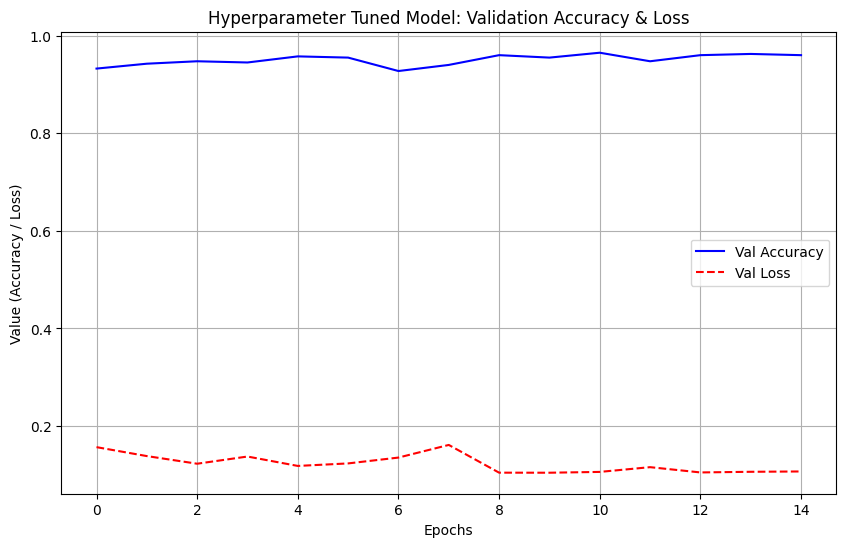

In [34]:
# Create a figure of size 10x6 inches for clear visualization
plt.figure(figsize=(10, 6))

# Plot Accuracy
# Plot validation accuracy as a solid blue line
plt.plot(history_best.history['val_accuracy'], label='Val Accuracy', color='blue', linestyle='-')

# Plot Loss
# Plot validation loss as a dashed red line
plt.plot(history_best.history['val_loss'], label='Val Loss', color='red', linestyle='--')

#  Titles and Labels
plt.title("Hyperparameter Tuned Model: Validation Accuracy & Loss")  # Main graph title
plt.xlabel("Epochs")                        # Label for x-axis
plt.ylabel("Value (Accuracy / Loss)")       # Label for y-axis

# Show legend to distinguish between train/validation and accuracy/loss
plt.legend()

# Add grid lines for clarity
plt.grid(True)

# Display the combined graph
plt.show()


**Insights:**

These graph shows the validation accuracy and loss trends for the hyperparameter-tuned artificial neural network model. The validation accuracy curve (blue line) maintains a consistently high value, hovering close to 0.96 (or 96%) across all epochs, while the validation loss (red dashed line) remains very low (around 0.1 or below). This indicates that the hyperparameter tuning process significantly improved the model’s performance and stability. Unlike the base model, the tuned model reaches high accuracy within just a few epochs and maintains it throughout training without signs of overfitting or oscillations. The reduction in both training time and validation loss demonstrates that the optimized parameters—such as learning rate, batch size, and number of neurons—help the model learn more efficiently. Hence, the tuned model not only performs better in terms of accuracy but also achieves higher convergence behavior compared to the base model.

# 6. Prediction on Unseen Data

## 6.1 Generate Random Unseen data

In [85]:
# Number of unseen samples you want
n_samples = 3
# This defines how many new (unseen) data points you want to generate for testing your model.

# Generate random unseen data
unseen_data = pd.DataFrame({
    # Create a new DataFrame with randomly generated feature values similar to the training data.

    'battery_power': np.random.randint(500, 5000, n_samples),
    #  Randomly generate integer values between 500 and 5000 for 'battery_power' feature.

    'bluetooth': np.random.randint(0, 2, n_samples),
    #  Randomly generate 0 or 1 values (no/yes) for 'bluetooth' availability.

    'clock_speed': np.round(np.random.uniform(0.5, 3.0, n_samples), 2),
    #  Generate floating-point values between 0.5 and 3.0 for CPU clock speed, rounded to 2 decimals.

    'dual_sim': np.random.randint(0, 2, n_samples),
    #  Randomly assign 0 or 1 to represent if the phone supports dual SIM.

    'front_cam': np.random.randint(0, 20, n_samples),
    #  Generate random front camera megapixels between 0 and 20.

    '4G': np.random.randint(0, 2, n_samples),
    #  Randomly assign 0 (no 4G) or 1 (4G support).

    'int_memory': np.random.randint(2, 256, n_samples),
    #  Internal memory in GB, random values between 2 and 256.

    'm_dep': np.round(np.random.uniform(0.1, 2.0, n_samples), 2),
    #  Mobile depth in cm, random float between 0.1 and 2.0, rounded to 2 decimals.

    'mobile_wt': np.random.randint(80, 250, n_samples),
    #  Mobile weight in grams, between 80 and 250.

    'n_cores': np.random.randint(1, 9, n_samples),
    #  Number of processor cores, between 1 and 8.

    'primary_camera': np.random.randint(0, 20, n_samples),
    #  Primary (rear) camera megapixels, between 0 and 20.

    'px_height': np.random.randint(400, 3000, n_samples),
    #  Screen pixel height between 400 and 3000.

    'px_width': np.random.randint(400, 3000, n_samples),
    #  Screen pixel width between 400 and 3000.

    'ram': np.random.randint(256, 4000, n_samples),
    #  RAM size in MB, between 256 and 4000.

    'sc_h': np.random.randint(5, 30, n_samples),
    #  Screen height in cm, between 5 and 30.

    'sc_w': np.random.randint(0, 20, n_samples),
    #  Screen width in cm, between 0 and 20.

    'talk_time': np.random.randint(2, 30, n_samples),
    #  Battery talk time in hours, between 2 and 30.

    'three_g': np.random.randint(0, 2, n_samples),
    #  Randomly assign 0 (no 3G) or 1 (3G support).

    'touch_screen': np.random.randint(0, 2, n_samples),
    #  Randomly assign 0 (non-touch) or 1 (touchscreen).

    'wifi': np.random.randint(0, 2, n_samples)
    #  Randomly assign 0 (no WiFi) or 1 (WiFi support).
})

# Convert the generated dictionary into a DataFrame
unseen_df = pd.DataFrame(unseen_data)

# Display the generated unseen data DataFrame
print(unseen_df)
# Prints the randomly generated unseen samples for verification.




   battery_power  bluetooth  clock_speed  dual_sim  front_cam  4G  int_memory  \
0           1475          0         2.57         0          1   1          34   
1           4681          0         2.61         0         19   1         249   
2            518          0         3.00         0          8   0          40   

   m_dep  mobile_wt  n_cores  primary_camera  px_height  px_width   ram  sc_h  \
0   0.19        154        8              14        408      2933   892    12   
1   1.29        146        1               6        675       875   314    15   
2   0.62        124        5              16        643      1621  1458    11   

   sc_w  talk_time  three_g  touch_screen  wifi  
0    12          6        0             0     1  
1    17          5        0             1     1  
2    18          3        0             1     0  


## 6.2 Scaled the Unseen **Data**

In [86]:
# Scale it with same scaler used earlier
unseen_df_scaled = scaler.transform(unseen_df)

unseen_df_scaled

array([[ 5.38304147e-01, -9.90049504e-01,  1.28432185e+00,
        -1.01918398e+00, -7.62494663e-01,  9.57885975e-01,
         1.07683195e-01, -1.08117599e+00,  3.88547264e-01,
         1.52124939e+00,  6.73533828e-01, -5.34424413e-01,
         3.89150204e+00, -1.13624482e+00, -7.27649718e-02,
         1.43112714e+00, -9.17330585e-01, -1.78686097e+00,
        -1.00601811e+00,  9.86096642e-01],
       [ 7.83613969e+00, -9.90049504e-01,  1.33335347e+00,
        -1.01918398e+00,  3.38462845e+00,  9.57885975e-01,
         1.19591738e+01,  2.73371924e+00,  1.62499841e-01,
        -1.53917473e+00, -6.45988793e-01,  6.73744224e-02,
        -8.71379329e-01, -1.66922857e+00,  6.39453349e-01,
         2.57915147e+00, -1.10039396e+00, -1.78686097e+00,
         9.94017892e-01,  9.86096642e-01],
       [-1.64012025e+00, -9.90049504e-01,  1.81141171e+00,
        -1.01918398e+00,  8.50275435e-01, -1.04396559e+00,
         4.38422467e-01,  4.10101237e-01, -4.59130571e-01,
         2.09639052e-01,  1.0

## 6.3 Predict using Best Trained Model

In [87]:
# Predict class probabilities for unseen (new) data
unseen_pred = best_model.predict(unseen_df_scaled)

# Display the predicted probabilities for each class
print("Predicted Probabilities:\n", unseen_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Predicted Probabilities:
 [[5.0670332e-03 9.9490803e-01 2.4882022e-05 1.4049679e-15]
 [1.0631293e-09 1.5405528e-04 6.2543863e-01 3.7440738e-01]
 [5.3774029e-01 4.6225968e-01 2.3837023e-08 4.9832850e-19]]


## 6.4 Convert Probabilities into Class Labels

In [88]:
# Convert predicted probabilities to class labels
unseen_pred_classes = np.argmax(unseen_pred, axis=1)

# Display the predicted class indices
print("\nPredicted Classes (Numeric Labels):", unseen_pred_classes)


Predicted Classes (Numeric Labels): [1 2 0]


## 6.4 Decode Labels into Readable Form

In [89]:
# label mapping
label_mapping = {
    0: 'Low Cost',
    1: 'Medium Cost',
    2: 'High Cost',
    3: 'Very High Cost'
}

# Decode numeric predictions
unseen_pred_labels = [label_mapping[label] for label in unseen_pred_classes]

# Display predictions with readable labels
print("\nPredicted Price Range Labels:", unseen_pred_labels)


Predicted Price Range Labels: ['Medium Cost', 'High Cost', 'Low Cost']


## 6.5  Combine Predictions with Unseen Data

In [90]:
# Add predictions to the unseen data for a clear view
unseen_df['Predicted_Price_Range'] = unseen_pred_labels

# Display the final DataFrame
print("\nFinal Unseen Data with Predictions:\n")
print(unseen_df)



Final Unseen Data with Predictions:

   battery_power  bluetooth  clock_speed  dual_sim  front_cam  4G  int_memory  \
0           1475          0         2.57         0          1   1          34   
1           4681          0         2.61         0         19   1         249   
2            518          0         3.00         0          8   0          40   

   m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0   0.19        154        8  ...        408      2933   892    12    12   
1   1.29        146        1  ...        675       875   314    15    17   
2   0.62        124        5  ...        643      1621  1458    11    18   

   talk_time  three_g  touch_screen  wifi  Predicted_Price_Range  
0          6        0             0     1            Medium Cost  
1          5        0             1     1              High Cost  
2          3        0             1     0               Low Cost  

[3 rows x 21 columns]


**Insight**

The model successfully classified the unseen mobile samples into distinct price categories:

* Sample 0 was predicted as “Medium Cost”, reflecting its moderate specifications, such as mid-range battery power, RAM, and camera features.

* Sample 1 was predicted as “High Cost”, consistent with its high-end features, including a powerful battery, high internal memory, and advanced camera specifications.

* Sample 2 was predicted as “Low Cost”, aligning with its lower specifications, such as minimal RAM, battery power, and fewer CPU cores.

**Conclusion**

These predictions demonstrate that the model generalizes well to unseen data. It accurately identifies the relationship between key mobile features—like RAM, battery power, CPU cores, and camera quality—and price ranges. This confirms the model’s reliability and effectiveness in helping estimate mobile prices based on technical specifications.

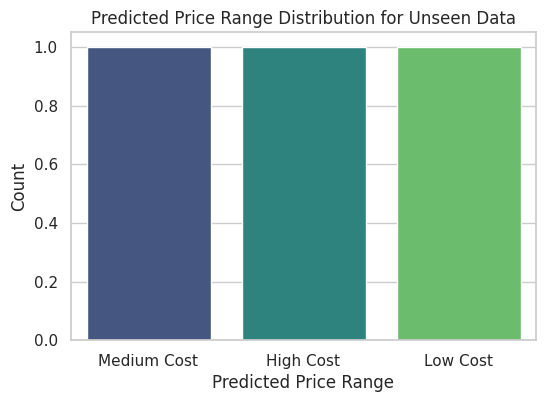

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar chart for predicted price range distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Predicted_Price_Range', data=unseen_df,hue='Predicted_Price_Range' ,palette='viridis')
plt.title('Predicted Price Range Distribution for Unseen Data')
plt.xlabel('Predicted Price Range')
plt.ylabel('Count')
plt.show()


**Insights:-**

The bar chart shows that the model predicted one mobile each in the “Low Cost,” “Medium Cost,” and “High Cost” categories for the unseen data. This even distribution indicates that the model is balanced and capable of differentiating between various price segments. It suggests that the predictive model effectively captures the relationship between technical specifications and price range, maintaining consistent performance across different cost levels.


# Overall Conclusion:

In this assignment, we developed an **artificial neural network (ANN)-based classifier** to predict mobile price ranges using features such as RAM, internal memory, battery power, camera quality, and connectivity options, etc. The base model achieved a test accuracy of **91.75%**, which increased to **96.5%** after **hyperparameter tuning**, showing the effectiveness of model optimization. The evaluation metrics demonstrate that the model performs well across all price categories, and testing on unseen data confirms its reliability. This project provides Bob with a robust tool to estimate mobile prices, helping his company make informed decisions in a competitive market.
